In [2]:
import numpy as np
import tensorflow as tf

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('/kaggle/input/arsenicskinimagebd/ArsenicSkinImageBD/ArsenicSkinImageBD/Original')

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

['infacted', 'not_infacted']
Types of classes labels found:  2


In [3]:
class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('/kaggle/input/arsenicskinimagebd/ArsenicSkinImageBD/ArsenicSkinImageBD/Original' + '/' +item)
 #print(all_classes)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))
    #print(class_labels[:5])

In [4]:
# Build a dataframe        
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

     Labels                                           image
0  infacted  dataset_path/infacted/IMG_1465_augmented_1.png
1  infacted  dataset_path/infacted/IMG_1709_augmented_1.png
2  infacted  dataset_path/infacted/IMG_1578_augmented_2.png
3  infacted  dataset_path/infacted/IMG_1404_augmented_2.png
4  infacted  dataset_path/infacted/IMG_1585_augmented_6.png
             Labels                                              image
10174  not_infacted  dataset_path/not_infacted/IMG_2003_augmented_2...
10175  not_infacted             dataset_path/not_infacted/IMG_3234.JPG
10176  not_infacted  dataset_path/not_infacted/IMG_20230612_130050_...
10177  not_infacted  dataset_path/not_infacted/IMG_2065_augmented_5...
10178  not_infacted  dataset_path/not_infacted/IMG20230610180122_au...


In [5]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  10179
Labels
infacted        5187
not_infacted    4992
Name: count, dtype: int64


In [6]:
import cv2
path = '/kaggle/input/arsenicskinimagebd/ArsenicSkinImageBD/ArsenicSkinImageBD/Original/'
dataset_path = os.listdir('/kaggle/input/arsenicskinimagebd/ArsenicSkinImageBD/ArsenicSkinImageBD/Original')

im_size = 240

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [7]:
#This model takes input images of shape (224, 224, 3), and the input data should range [0, 255]. 

images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(10179, 240, 240, 3)

In [8]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
Y=y
print (Y)

['infacted' 'infacted' 'infacted' ... 'not_infacted' 'not_infacted'
 'not_infacted']
[0 0 0 ... 1 1 1]


In [9]:
y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #.toarray()
print(Y[:5])
print(Y[35:])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [10]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.30, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(7125, 240, 240, 3)
(7125, 2)
(3054, 240, 240, 3)
(3054, 2)


In [11]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB1

NUM_CLASSES = 2
IMG_SIZE = 240
size = (IMG_SIZE, IMG_SIZE)


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))


# Using model without transfer learning

outputs = EfficientNetB1(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [12]:
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )

model.summary()

hist = model.fit(train_x, train_y, epochs=20, verbose=2)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb1 (Functional)     │ (None, 2)              │     6,577,801 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,577,801 (25.09 MB)

 Trainable params: 6,515,746 (24.86 MB)

 Non-trainable params: 62,055 (242.41 KB)

Epoch 1/20


I0000 00:00:1726639039.748656     545 service.cc:145] XLA service 0x780ab00149b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726639039.748703     545 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1726639039.748707     545 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1726639122.310135     545 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


223/223 - 263s - 1s/step - accuracy: 0.6338 - loss: 1.3065
Epoch 2/20
223/223 - 45s - 201ms/step - accuracy: 0.7381 - loss: 0.7761
Epoch 3/20
223/223 - 44s - 196ms/step - accuracy: 0.7632 - loss: 0.6428
Epoch 4/20
223/223 - 44s - 199ms/step - accuracy: 0.7920 - loss: 0.4987
Epoch 5/20
223/223 - 44s - 198ms/step - accuracy: 0.8276 - loss: 0.4046
Epoch 6/20
223/223 - 44s - 198ms/step - accuracy: 0.8501 - loss: 0.3646
Epoch 7/20
223/223 - 44s - 198ms/step - accuracy: 0.8721 - loss: 0.3097
Epoch 8/20
223/223 - 44s - 198ms/step - accuracy: 0.8827 - loss: 0.2826
Epoch 9/20
223/223 - 44s - 198ms/step - accuracy: 0.8982 - loss: 0.2421
Epoch 10/20
223/223 - 44s - 198ms/step - accuracy: 0.9123 - loss: 0.2209
Epoch 11/20
223/223 - 44s - 198ms/step - accuracy: 0.9020 - loss: 0.2375
Epoch 12/20
223/223 - 44s - 198ms/step - accuracy: 0.9225 - loss: 0.2045
Epoch 13/20
223/223 - 44s - 198ms/step - accuracy: 0.9173 - loss: 0.2240
Epoch 14/20
223/223 - 44s - 198ms/step - accuracy: 0.9333 - loss: 0.1708


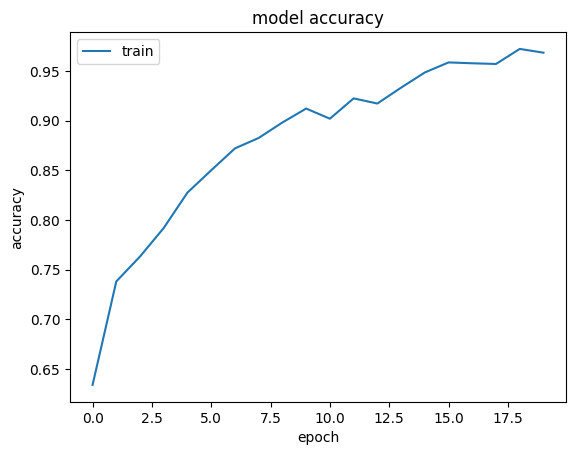

In [13]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [14]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 121ms/step - accuracy: 0.9463 - loss: 0.1561
Loss = 0.1558147370815277
Test Accuracy = 0.9469547867774963


96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 117ms/step


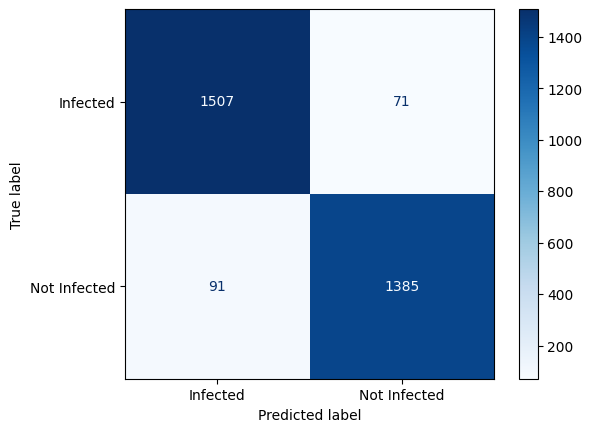

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Make predictions
y_pred = model.predict(test_x)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot encoded predictions to class labels if needed
y_true_classes = np.argmax(test_y, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Infected', 'Not Infected'])
disp.plot(cmap='Blues')


Input image shape: (1, 240, 240, 3)


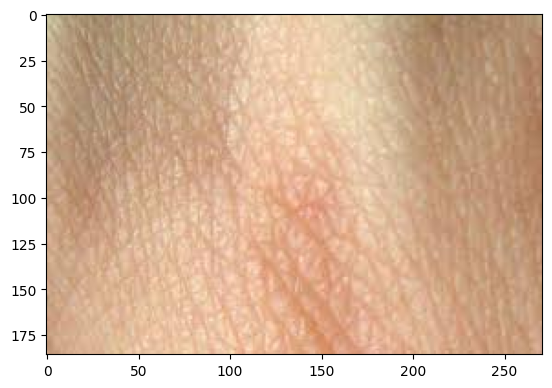

In [24]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


img_path = '/kaggle/input/unseen/noars1.jpeg'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (240, 240))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [25]:
preds=model.predict(x)
preds    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[1., 0.]], dtype=float32)